In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
files = np.sort(glob.glob('/Users/user/Downloads/plant-seedlings-classification/train/*/*png'))

In [324]:
labels = [f.split('/')[-2] for f in files]

In [325]:
names = np.sort(np.unique(labels))
label_df = pd.DataFrame({'category': names, 'label': np.arange(len(names))})

In [326]:
label_df

,category,label
0,Black-grass,0
1,Charlock,1
2,Cleavers,2
3,Common Chickweed,3
4,Common wheat,4
5,Fat Hen,5
6,Loose Silky-bent,6
7,Maize,7
8,Scentless Mayweed,8
9,Shepherds Purse,9


In [327]:
files_df = pd.DataFrame({'filename': files, 'category': labels})
files_df = pd.merge(files_df, label_df, on=['category'], how='left')

In [328]:
files_df.category.value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
Name: category, dtype: int64

In [329]:
files_df[files_df.category == name].sample().filename.squeeze()

'/Users/user/Downloads/plant-seedlings-classification/train/Sugar beet/2933913e4.png'

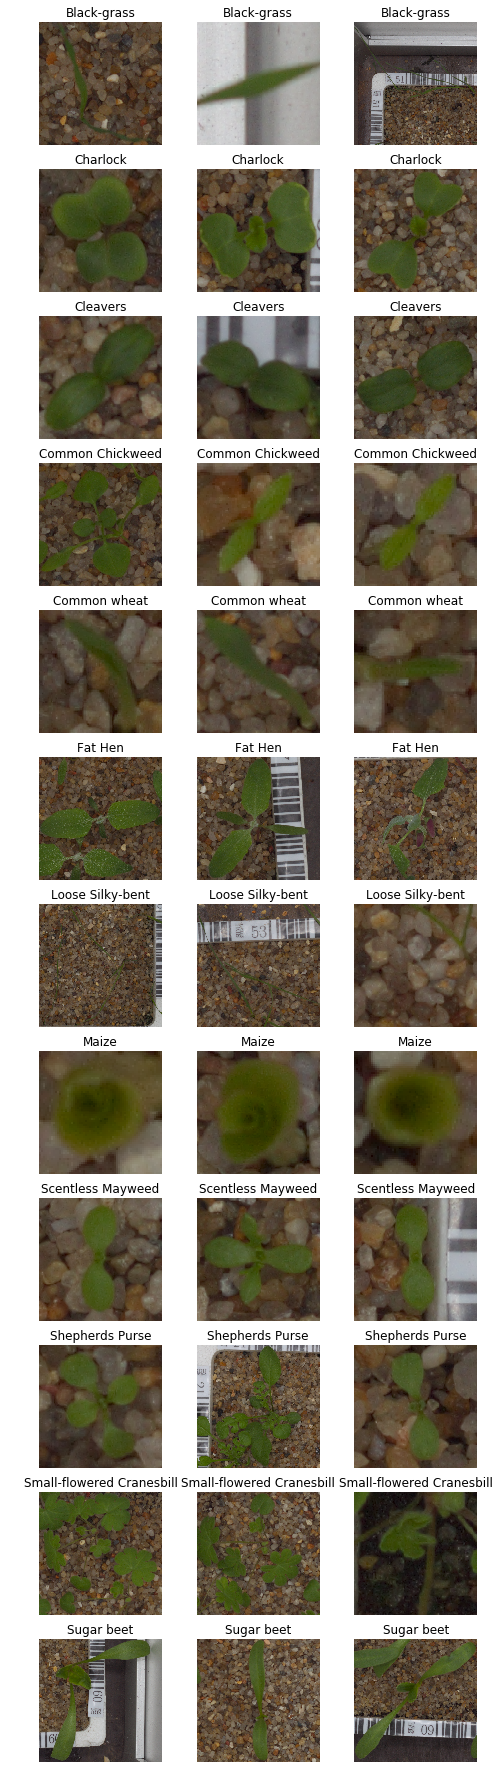

In [330]:
fig, axes = plt.subplots(12, 3)
fig.set_figheight(32)
fig.set_figwidth(8)
for i, name in enumerate(names):
    f = files_df[files_df.category == name].sample(3).filename.values
    for j in range(3):
        axes[i][j].imshow(plt.imread(f[j]))
        axes[i][j].axis('off')
        axes[i][j].set_title(name)

In [332]:
n_shards = 10
shards_iid = np.random.permutation(np.tile(np.arange(n_shards), 400))
shards_non_iid = np.tile(np.tile(np.arange(n_shards)[:, None], [1, 200]), [2, 1])
shards_non_iid = np.concatenate(np.random.permutation(shards_non_iid))

In [333]:
train, val = np.split(np.random.permutation(4750), [4000])

In [334]:
train_df = files_df.loc[train].sort_values(by='category')
val_df = files_df.loc[val]

In [335]:
len(shards_iid)

4000

In [336]:
train_df['shard_iid'] = shards_iid
train_df['shard_non_iid'] = shards_non_iid

In [337]:
train_df.groupby('shard_non_iid', as_index=False).category.agg(lambda x: len(x.category.unique())).rename(columns={'category': 'num_categories'})

,shard_non_iid,num_categories
0,0,3
1,1,3
2,2,3
3,3,2
4,4,3
5,5,4
6,6,3
7,7,2
8,8,3
9,9,4


In [338]:
train_df.groupby('shard_iid', as_index=False).category.agg(lambda x: len(x.category.unique())).rename(columns={'category': 'num_categories'})

,shard_iid,num_categories
0,0,12
1,1,12
2,2,12
3,3,12
4,4,12
5,5,12
6,6,12
7,7,12
8,8,12
9,9,12


In [339]:
# train_df.to_csv('seedlings_train.csv')
# val_df.to_csv('seedlings_val.csv')

In [7]:
len(files)

4750

In [ ]:
heights, widths, channels = zip(*list(map(plt.imread, files)))